# Explotary Data Analysis

In [3]:
import pandas as pd

preview_df = pd.read_csv('../Data/complaints.csv', nrows=100000, usecols=['Product'])

print("Unique products found in the first 100k rows:")
print(preview_df['Product'].unique())

Unique products found in the first 100k rows:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan']


### word count statistics for the entire unfiltered dataset

In [ ]:
import pandas as pd
import numpy as np

input_file = '../Data/complaints.csv'
all_word_counts = []

print("Scanning all 2.98 million narratives. This may take a minute...")


for chunk in pd.read_csv(input_file, chunksize=250000, usecols=['Consumer complaint narrative'], low_memory=False):
    # Drop rows without text
    narratives = chunk['Consumer complaint narrative'].dropna()
    
    # Calculate word count for everything that has text
    counts = narratives.apply(lambda x: len(str(x).split())).tolist()
    
    # Store the results in our list
    all_word_counts.extend(counts)

# Convert to a Series to use .describe()
word_count_series = pd.Series(all_word_counts)

print("\n--- UNFILTERED Word Count Statistics (All Products) ---")
print(word_count_series.describe())

# Calculate Percentiles for your report
print(f"\n90th Percentile: {np.percentile(all_word_counts, 90)} words")
print(f"99th Percentile: {np.percentile(all_word_counts, 99)} words")

Scanning all 2.98 million narratives. This may take a minute...

--- UNFILTERED Word Count Statistics (All Products) ---
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
dtype: float64

90th Percentile: 364.0 words
99th Percentile: 1021.0 words


### Filter and Save by the required Products and columns 

In [4]:
import os

input_file = '../Data/complaints.csv' 
output_dir = '../Data/filtered'
output_file = os.path.join(output_dir, 'filtered_complaints.csv')


os.makedirs(output_dir, exist_ok=True)
print(f"Verified: '{output_dir}' exists.")


target_products = [
    'Credit card',                                          
    'Payday loan, title loan, personal loan, or advance loan', 
    'Checking or savings account',                           
    'Money transfer, virtual currency, or money service',
    'Debt collection'  
]



required_cols = ['Complaint ID', 'Product', 'Consumer complaint narrative', 'Issue', 'Company', 'Date received']

first_chunk = True
for chunk in pd.read_csv(input_file, chunksize=50000, usecols=required_cols, low_memory=False):
    # Filter for specific products 
    filtered_chunk = chunk[chunk['Product'].isin(target_products)]
    
    # Remove records with empty narratives 
    filtered_chunk = filtered_chunk.dropna(subset=['Consumer complaint narrative'])
    
    # Save to the verified directory
    filtered_chunk.to_csv(output_file, mode='a', index=False, header=first_chunk)
    first_chunk = False

print(f"Filtering complete. File saved to: {output_file}")

Verified: '../Data/filtered' exists.
Filtering complete. File saved to: ../Data/filtered/filtered_complaints.csv


In [5]:
### uniques products
df = pd.read_csv('../Data/filtered/filtered_complaints.csv')
print(df['Product'].unique())

['Credit card' 'Checking or savings account'
 'Payday loan, title loan, personal loan, or advance loan'
 'Money transfer, virtual currency, or money service' 'Product'
 'Debt collection']


/tmp/ipykernel_93684/533050754.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/filtered/filtered_complaints.csv')


In [3]:
df.head(10)

,Date received,Product,Issue,Consumer complaint narrative,Company,Complaint ID
0,2025-06-13,Credit card,Getting a credit card,A XXXX XXXX card was opened under my name by a...,"CITIBANK, N.A.",14069121
1,2025-06-13,Checking or savings account,Managing an account,I made the mistake of using my wellsfargo debi...,WELLS FARGO & COMPANY,14061897
2,2025-06-12,Credit card,"Other features, terms, or problems","Dear CFPB, I have a secured credit card with c...","CITIBANK, N.A.",14047085
3,2025-06-12,Credit card,Incorrect information on your report,I have a Citi rewards cards. The credit balanc...,"CITIBANK, N.A.",14040217
4,2025-06-09,Credit card,Problem with a purchase shown on your statement,b'I am writing to dispute the following charge...,"CITIBANK, N.A.",13968411
5,2025-06-09,Credit card,Problem when making payments,"Although the account had been deemed closed, I...",Atlanticus Services Corporation,13965746
6,2025-06-08,Checking or savings account,Managing an account,Got locked out of my account because I was try...,"CITIBANK, N.A.",13960106
7,2025-06-11,Credit card,Problem when making payments,I was trying to log into my account and it wou...,"CITIBANK, N.A.",14025020
8,2025-06-07,Credit card,Problem with a purchase shown on your statement,I received an email in XXXX from my XXXX XXXX ...,"CITIBANK, N.A.",13950990
9,2025-06-07,"Payday loan, title loan, personal loan, or adv...",Problem with the payoff process at the end of ...,under Idaho state law28-46-413. PAYDAY LOAN BU...,QC HOLDINGS INC,13949860


### Distribution of complaints across Products.

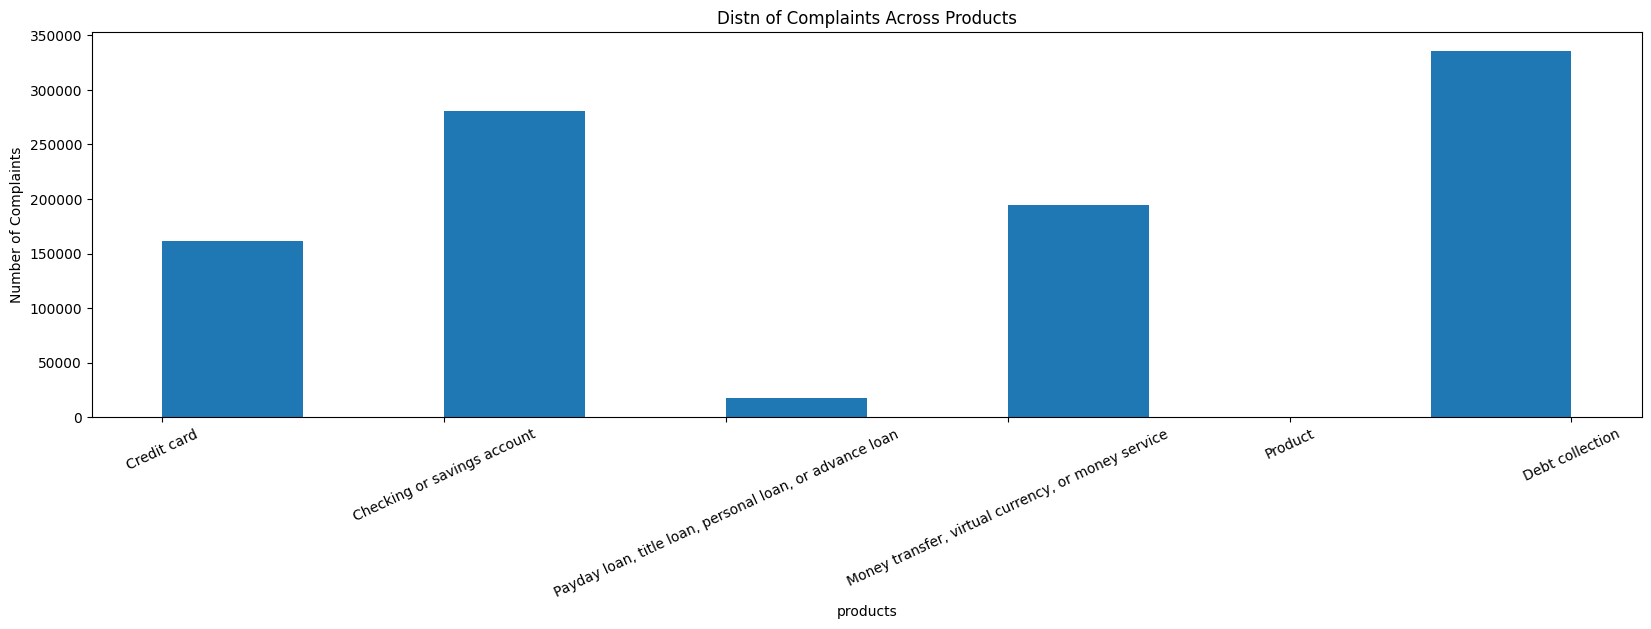

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.hist(x=df['Product'])
plt.xticks(rotation = 25)
plt.title("Distn of Complaints Across Products")
plt.xlabel("products")
plt.ylabel("Number of Complaints")
plt.show()


### Calculate and visualize the length (word count) of the Consumer complaint narrative

Word Count Statistics
count    990217.000000
mean        187.845912
std         223.905931
min           1.000000
25%          71.000000
50%         118.000000
75%         231.000000
max        6469.000000
Name: word_count, dtype: float64


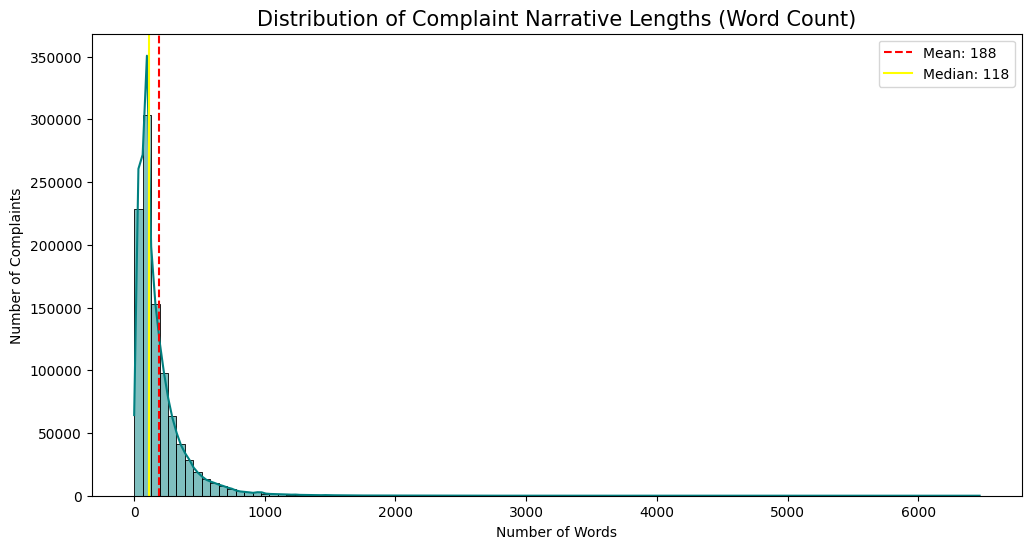

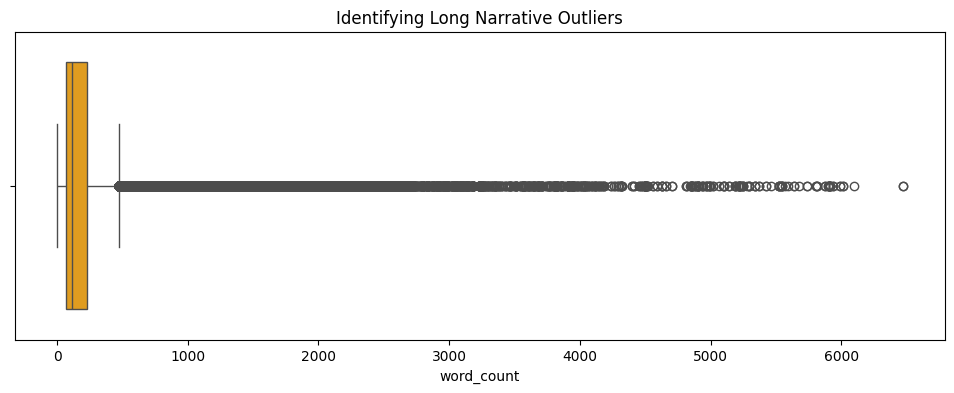

In [7]:
import seaborn as sns
df['word_count'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

# summary statistics
print("Word Count Statistics")
print(df['word_count'].describe())

plt.figure(figsize=(12, 6))

# Histogram to see the distribution
sns.histplot(df['word_count'], bins=100, kde=True, color='teal')

# Add lines for Average and Median
plt.axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.0f}')
plt.axvline(df['word_count'].median(), color='yellow', linestyle='-', label=f'Median: {df["word_count"].median():.0f}')

plt.title('Distribution of Complaint Narrative Lengths (Word Count)', fontsize=15)
plt.xlabel('Number of Words')
plt.ylabel('Number of Complaints')
plt.legend()
plt.show()

# 5. Boxplot to specifically spot "Very Long" outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['word_count'], color='orange')
plt.title('Identifying Long Narrative Outliers')
plt.show()

Summary for your Task 1 Report:"The narrative lengths are highly varied ($Std \approx 227$). While the typical complaint is concise ($\text{Median} = 126$ words), the presence of extreme outliers ($\text{Max} = 6,469$ words) necessitates a robust text-chunking strategy for the RAG pipeline to ensure no information is lost due to model context limits."

### Number of Complaints with and without Narrative  before and after product filter

#### Before filter

In [10]:
input_file = '../Data/complaints.csv'
has_narrative_count = 0
no_narrative_count = 0

for chunk in pd.read_csv(input_file, chunksize=100000, usecols=['Consumer complaint narrative'], low_memory=False):
    # Count rows where text exists
    has_narrative_count += chunk['Consumer complaint narrative'].notna().sum()
    
    # Count rows where text is blank/NaN
    no_narrative_count += chunk['Consumer complaint narrative'].isna().sum()

print(f"Complaints WITH a narrative: {has_narrative_count:,}")
print(f"Complaints WITHOUT a narrative: {no_narrative_count:,}")

Complaints WITH a narrative: 2,980,756
Complaints WITHOUT a narrative: 6,629,041


#### After filter

In [9]:
input_file = '../Data/filtered/filtered_complaints.csv'
has_narrative_count = 0
no_narrative_count = 0

for chunk in pd.read_csv(input_file, chunksize=100000, usecols=['Consumer complaint narrative'], low_memory=False):
    # Count rows where text exists
    has_narrative_count += chunk['Consumer complaint narrative'].notna().sum()
    
    # Count rows where text is blank/NaN
    no_narrative_count += chunk['Consumer complaint narrative'].isna().sum()

print(f"Complaints WITH a narrative: {has_narrative_count:,}")
print(f"Complaints WITHOUT a narrative: {no_narrative_count:,}")

Complaints WITH a narrative: 327,070
Complaints WITHOUT a narrative: 0
